In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
from scipy.stats import mannwhitneyu # nonparametric test
import random


%matplotlib inline

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp


In [3]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

In [4]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_countN[i]) for i in range(num_samples)]

# clean-up datasets here
omc_clean = []
for i in range(num_samples):
    omc_clean.append(clean_up_data(omc_type[i]))


omc_pt = [(omc_clean[i][omc_clean[i]['type']=="PT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_clean[i][omc_clean[i]['type']=="IT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]



/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/

In [5]:

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_clean[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_clean[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

# histograms

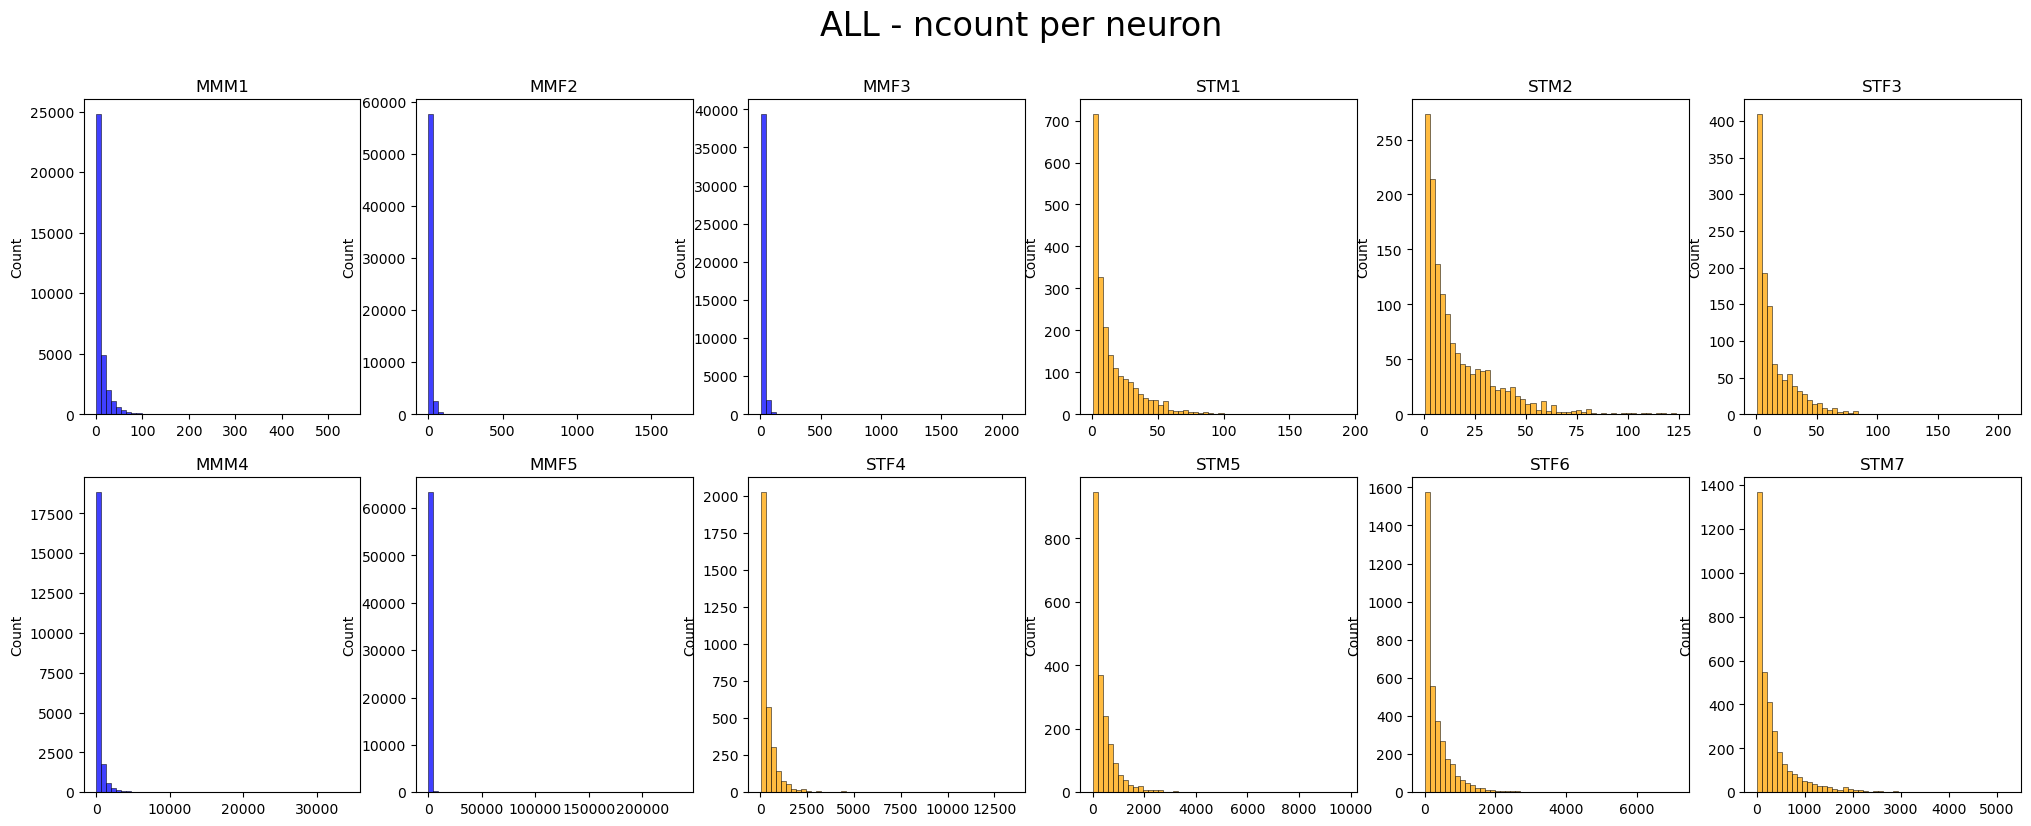

In [10]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    # ax.set_xlim(0,5000)
    i+=1
fig.suptitle("ALL - ncount per neuron", size=24)
plt.show()

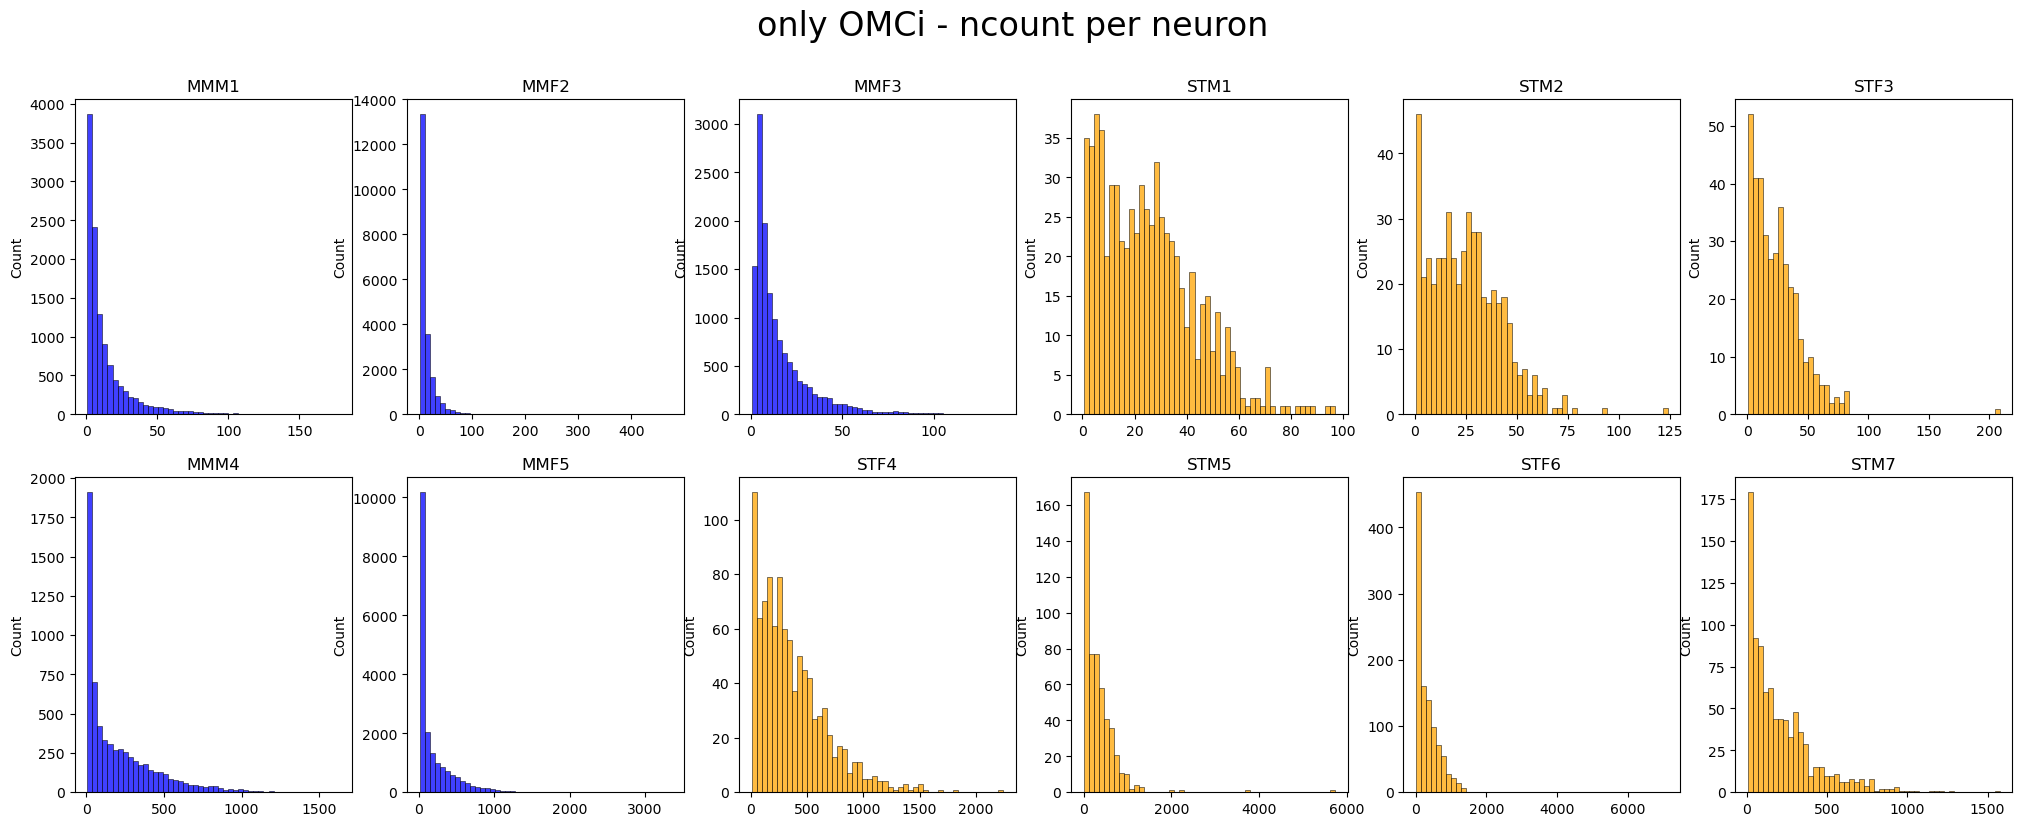

In [11]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i]["OMCi"]
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    # ax.set_xlim(0,5000)
    i+=1
fig.suptitle("only OMCi - ncount per neuron", size=24)
plt.show()

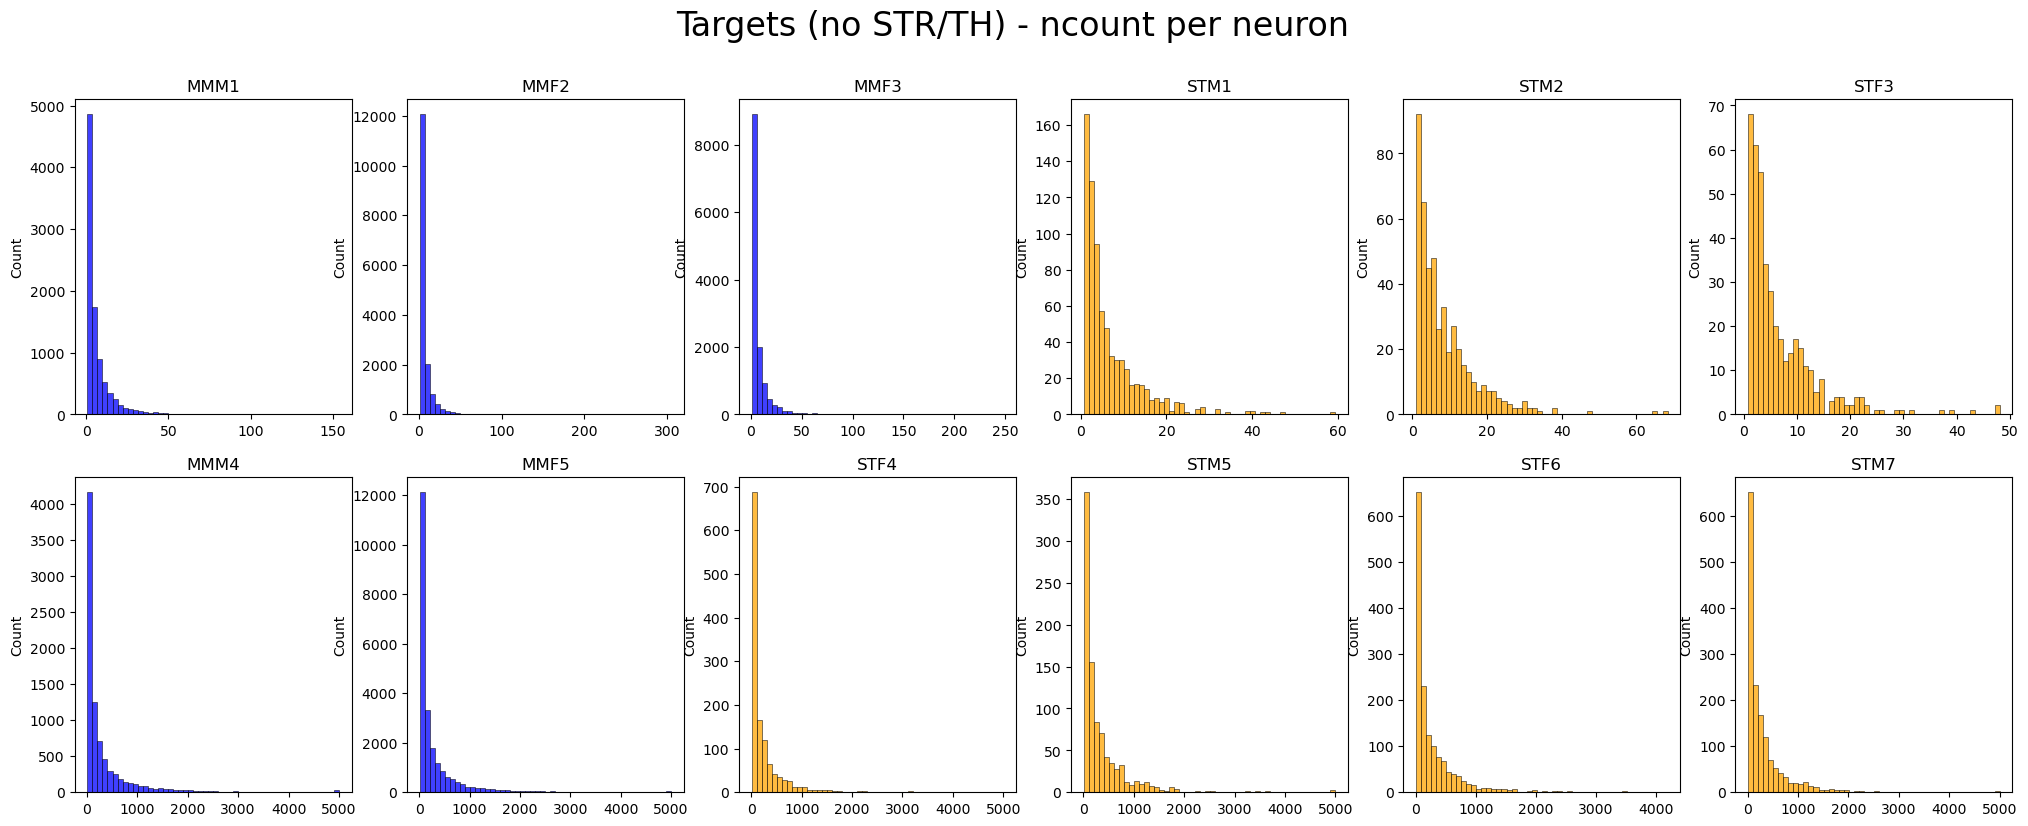

In [12]:
# normalize by total barcode counts per animal
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["OMCi", "STR", "TH", "type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    # ax.set_xlim(0,5000)
    i+=1
fig.suptitle("Targets (no STR/TH) - ncount per neuron", size=24)
plt.show()

In [20]:
# calculate median barcode number
medians = []
for i in range(num_samples):
    df = omc_clean[i].drop(["OMCi", "STR", "TH", "type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    medians.append(np.median(plot))
medians

[3.6036036036036037,
 2.909796314258002,
 3.3206093896964752,
 3.971116952173782,
 5.635914758637611,
 4.275292833423201,
 112.67114033507477,
 96.59007069365634,
 85.33281827180761,
 151.13863671334053,
 119.80614465232011,
 145.16129032258067]

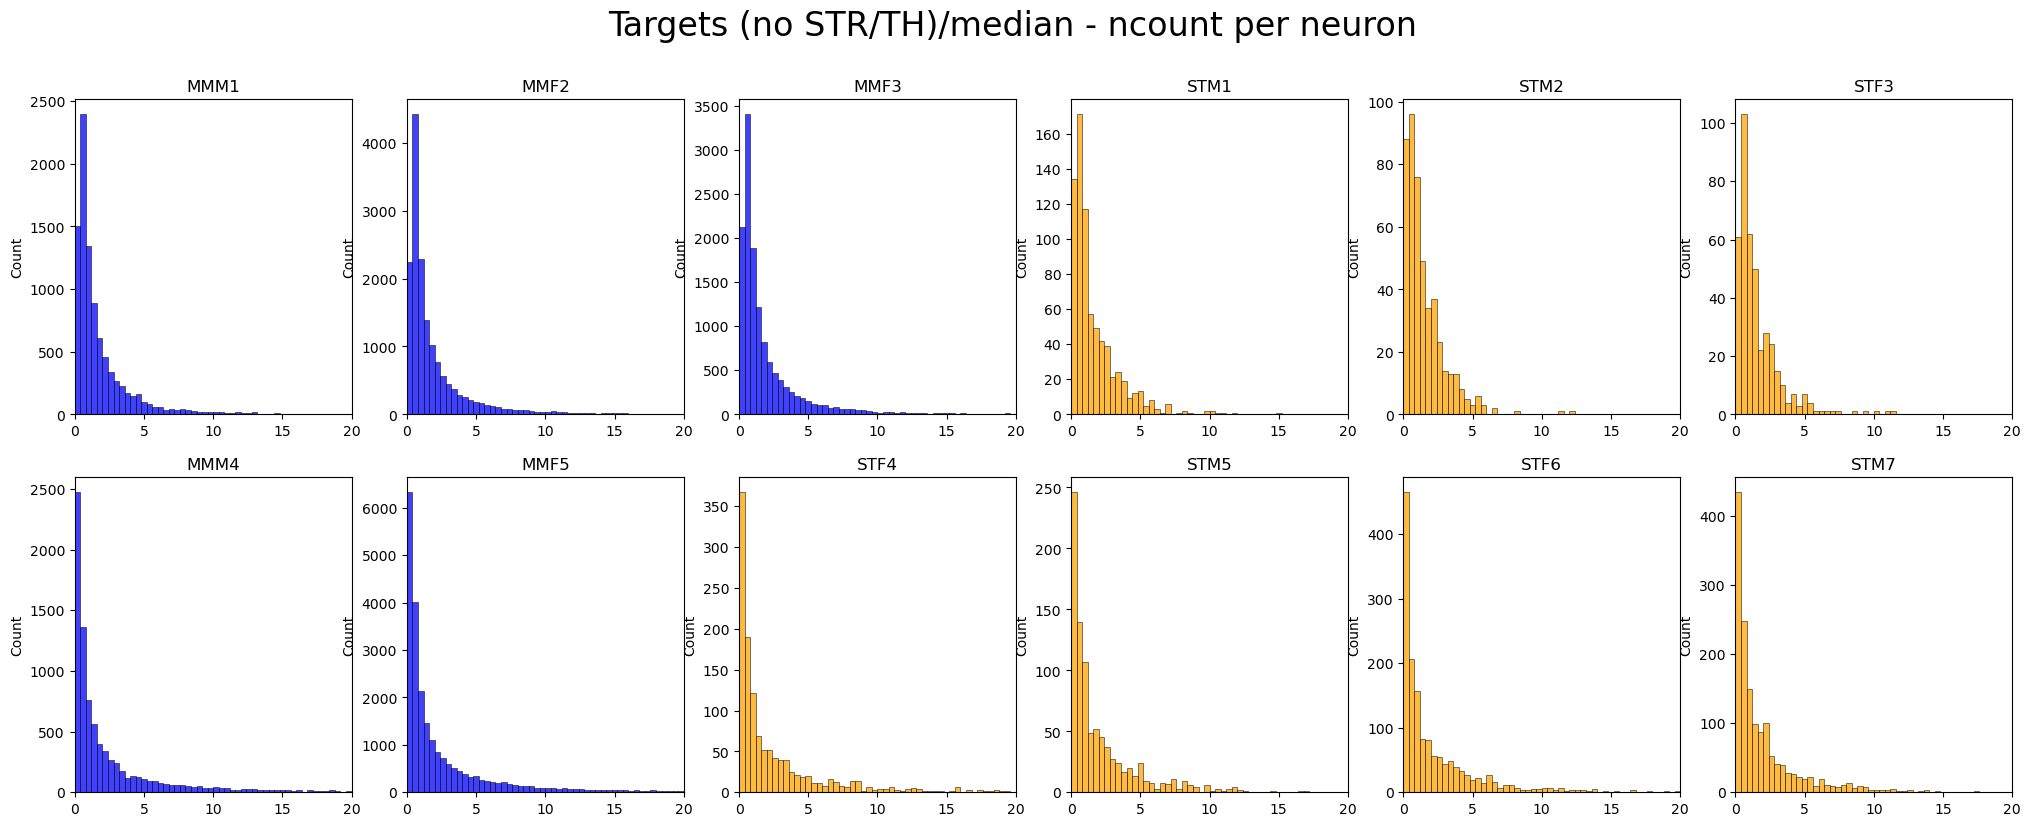

In [28]:
# normalize by median barcode counts per animal
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["OMCi", "STR", "TH", "type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    median = np.median(plot)
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    plot[plot > 5000] = 5000
    plot = plot/median
    sns.histplot(plot, bins = 50, binrange=(0,20), legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,20)
    i+=1
fig.suptitle("Targets (no STR/TH)/median - ncount per neuron", size=24)
plt.show()

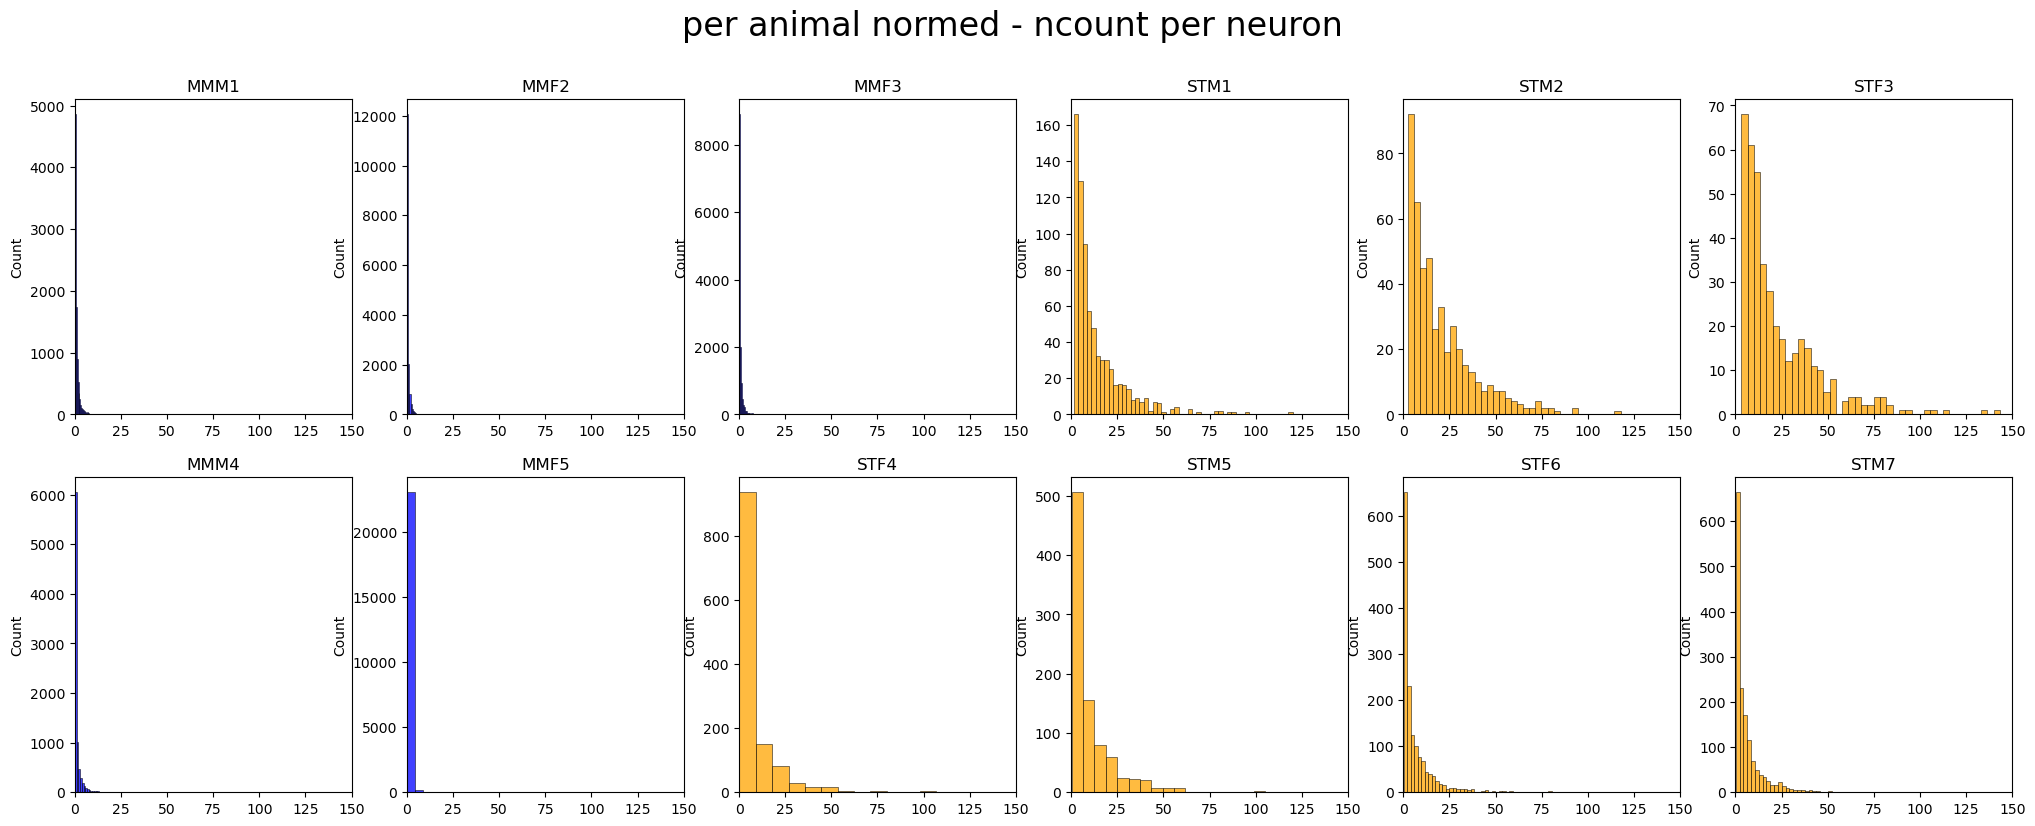

In [ ]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    dfi = omc_clean[i].drop(["OMCi", "STR", "TH", "type"], axis=1)

    # set cut-off for outliers at 5000
    df[df > 5000] = 5000

    # divide matrix by total BC counts
    total_bc = dfi.sum().sum()
    df = dfi/total_bc * 10000 # scale up so numbers are reasonable

    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,150)
    i+=1
fig.suptitle("per animal normed select targets - ncount per neuron", size=24)
plt.show()

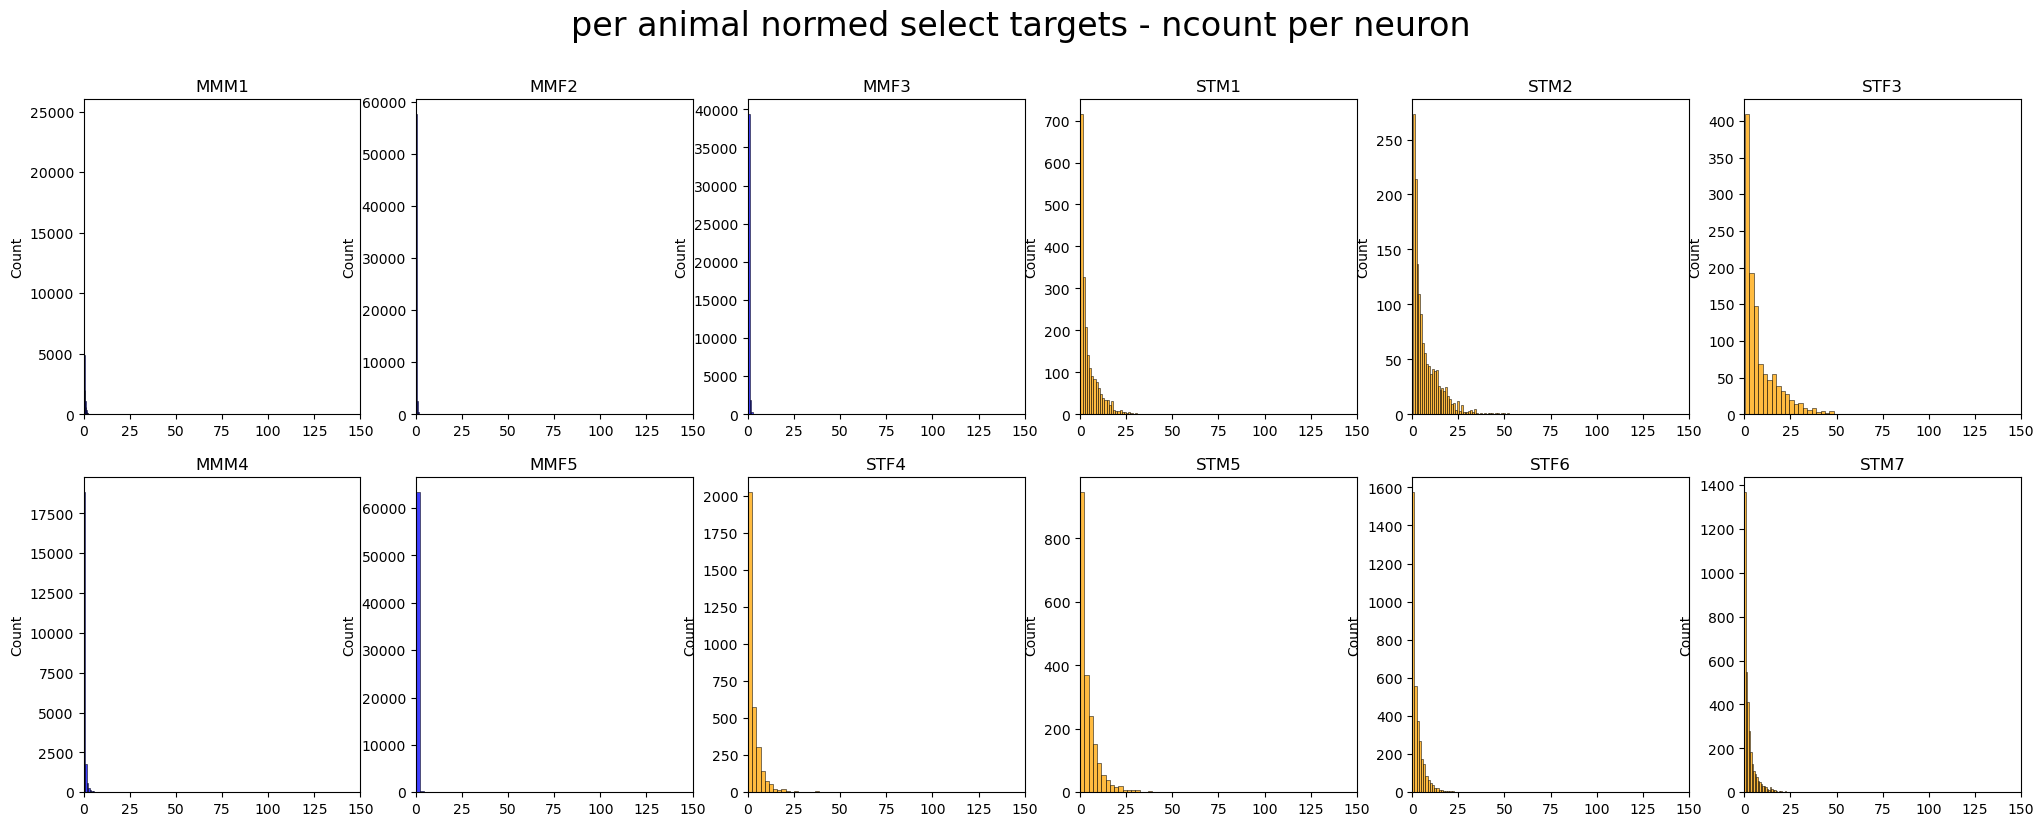

In [ ]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    dfi = omc_clean[i].drop(["type"], axis=1)

    # normalized by OMCi
    df = dfi/dfi["OMCi"]

    # set cut-off for outliers at 5000
    # df[df > 5000] = 5000

    # divide matrix by total BC counts
    total_bc = dfi.sum().sum()
    df = dfi/total_bc * 10000 # scale up so numbers are reasonable

    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,150)
    i+=1
fig.suptitle("per animal normed all areas - ncount per neuron", size=24)
plt.show()

In [ ]:
df = omc_clean[0].drop("type", axis=1)
display(df)
display((df.T / df.OMCi).T)

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
0,57.103800,137.127453,0.0,42.190510,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,96.779518,124.909462,0.0,542.350316,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,30.845302,123.762430,0.0,53.676099,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,45.428137,111.553123,0.0,103.713328,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,2.239510,106.507643,0.0,107.347710,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11739,2.750923,0.000000,0.0,13.041508,0.000000,2.702703,0.0,4.918537,8.248508,0.000000,0.0,0.000000
11740,13.174360,0.000000,0.0,27.391324,14.076010,3.783784,0.0,0.000000,0.877501,2.105263,0.0,0.000000
11741,7.243324,0.000000,0.0,12.511551,1.608687,1.621622,0.0,1.998156,0.000000,2.429150,0.0,0.000000
11742,7.676984,0.000000,0.0,3.801407,1.608687,1.261261,0.0,0.000000,0.000000,2.267206,0.0,0.000000


,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
0,1.0,2.401372,0.0,0.738839,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,1.0,1.290660,0.0,5.603978,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,1.0,4.012359,0.0,1.740171,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,1.0,2.455595,0.0,2.283020,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,1.0,47.558458,0.0,47.933570,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11739,1.0,0.000000,0.0,4.740776,0.000000,0.982471,0.0,1.787959,2.998452,0.000000,0.0,0.000000
11740,1.0,0.000000,0.0,2.079139,1.068440,0.287208,0.0,0.000000,0.066607,0.159800,0.0,0.000000
11741,1.0,0.000000,0.0,1.727322,0.222092,0.223878,0.0,0.275862,0.000000,0.335364,0.0,0.000000
11742,1.0,0.000000,0.0,0.495169,0.209547,0.164291,0.0,0.000000,0.000000,0.295325,0.0,0.000000


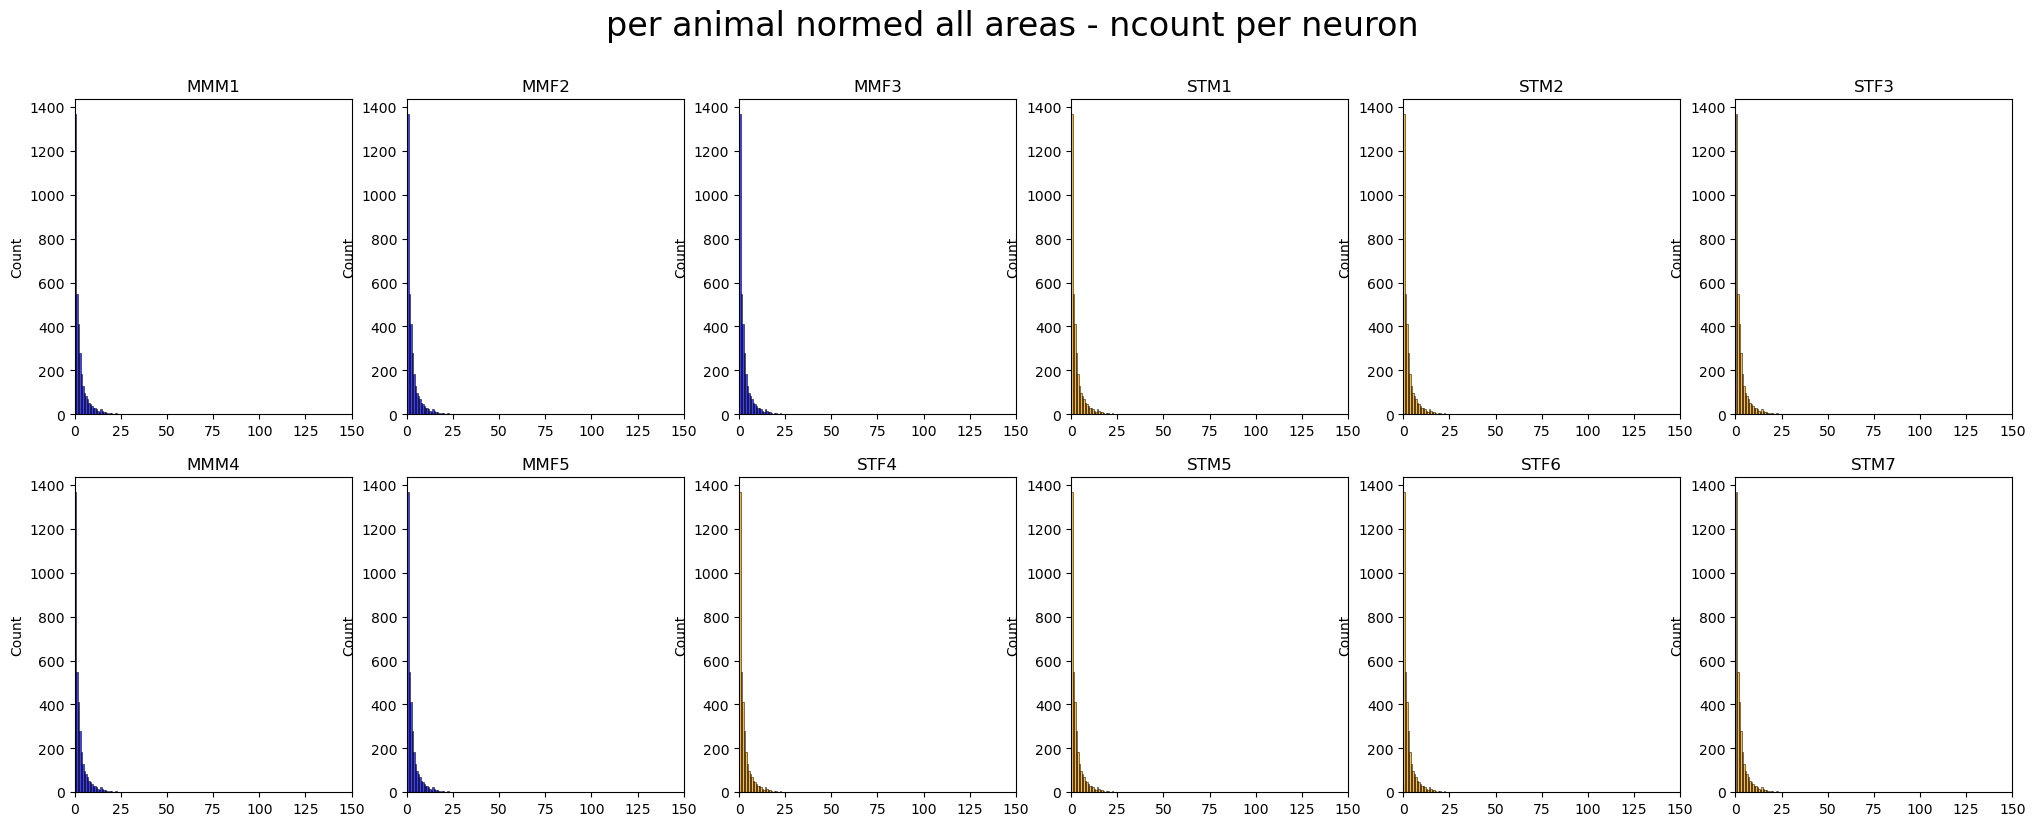

In [ ]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["type"], axis=1)
    df = (df.T / df.OMCi).T # normalize to max row count
    # set cut-off for outliers at 5000
    df[df > 5000] = 5000

    # divide matrix by total BC counts
    total_bc = dfi.sum().sum()
    df = dfi/total_bc * 10000 # scale up so numbers are reasonable

    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,150)
    i+=1
fig.suptitle("per animal normed all areas - ncount per neuron", size=24)
plt.show()

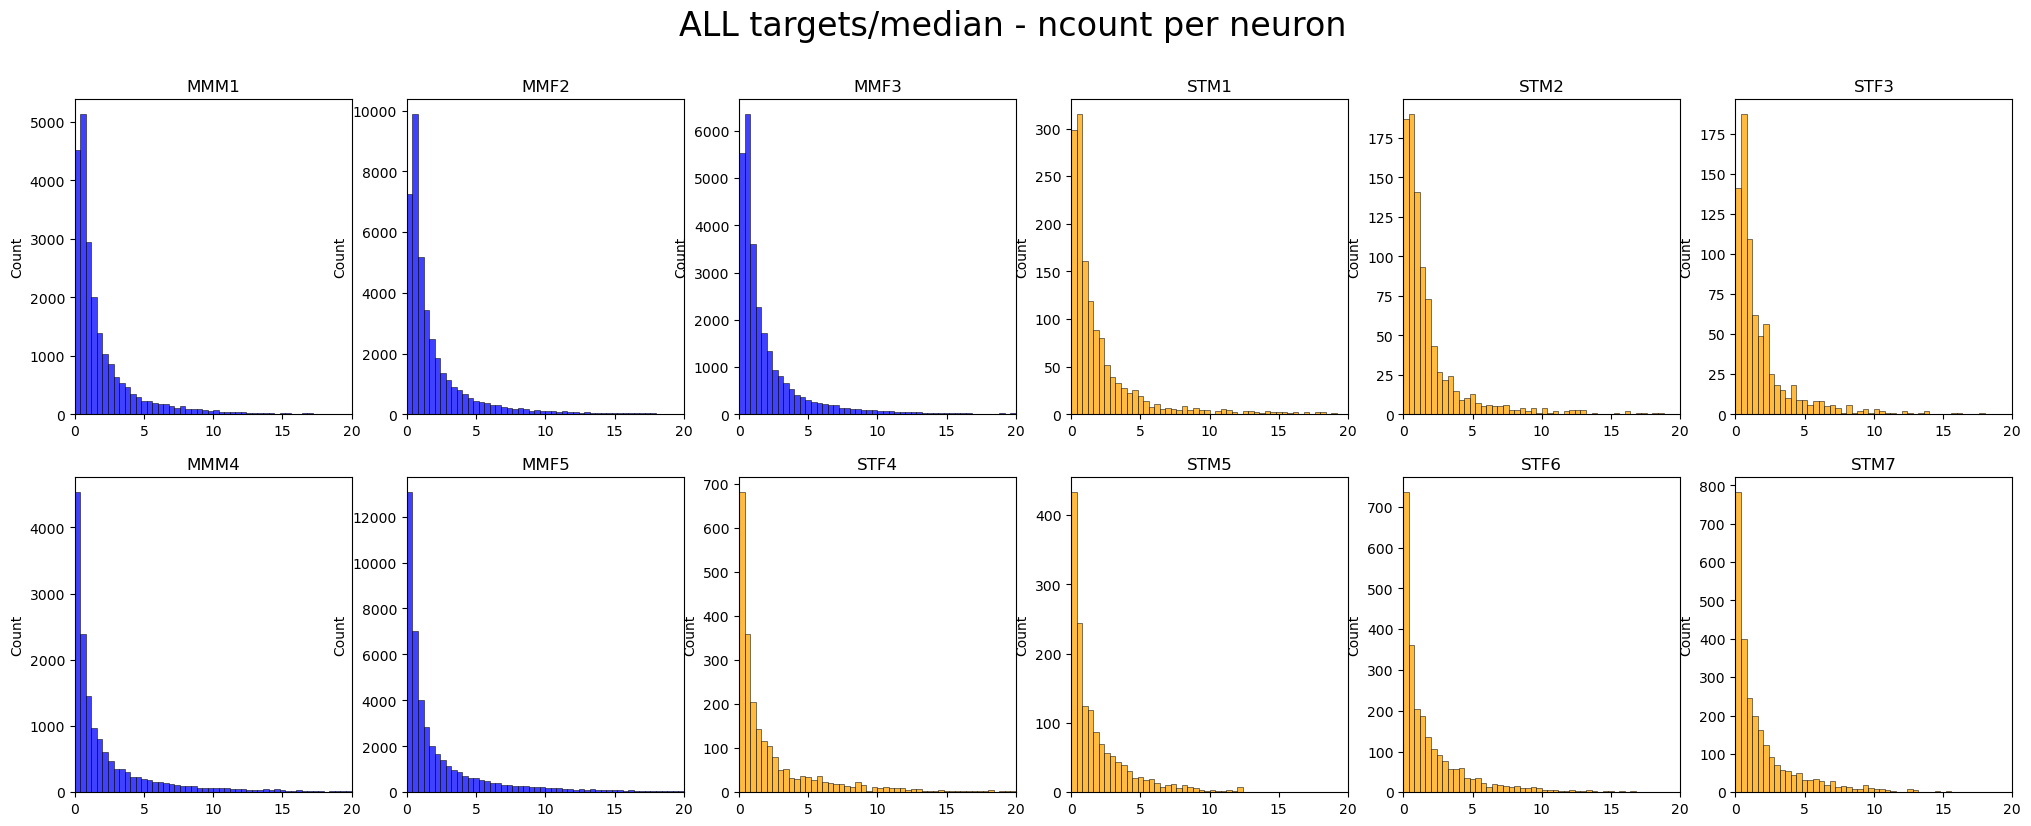

In [30]:
# normalize by median barcode counts per animal
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["OMCi", "type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    median = np.median(plot)
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    plot = plot/median
    sns.histplot(plot, bins = 50, binrange=(0,20), legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,20)
    i+=1
fig.suptitle("ALL targets/median - ncount per neuron", size=24)
plt.show()

# preprocessing
Based on above graphs, decided to use median count to normalize ncounts

In [6]:
def dfs_preprocess_counts(df_list, drop=["OMCi", "type"]):
    """preprocess ncounts - normalize to median

    Args:
        df_list (list)  | List of dataframes of ncounts
        drop (list)     | List of columns to drop and not account for when determining median

    returns:
        out_list (list): List of dataframes normalized to dataframe median
    """
    out_list = []
    for i in range(len(df_list)):
        df = df_list[i].drop(drop, axis=1)
        vals = df.values.flatten()
        idx = vals.nonzero()
        plot = vals[idx]
        median = np.median(plot)
        out_df = df/median

        for j in range(len(drop)):
            out_df[drop[j]] = df_list[i][drop[j]]
        
        out_list.append(out_df)
    return out_list


# CDF by area

In [7]:
omc_processed = dfs_preprocess_counts(omc_clean) # note: processing doesn't median normalize OMCi


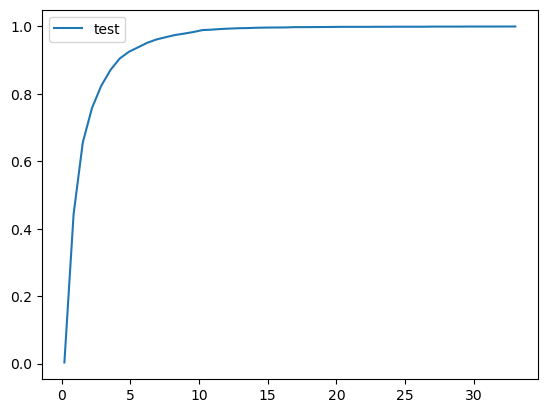

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
df = omc_processed[0]
col = df["OMCc"]
col = col[col >0] # only keep nonzeros
# data = pd.DataFrame({"BC_neuron": col, "Mice":mice[i], "Species":species[i], "Dataset":dataset[i]})
# plot = pd.concat([plot, data])
ecdf = ECDF(col)
# plt.plot(ecdf)
x = np.linspace(col.min(), col.max())
y = ecdf(x)
plt.plot(x,y, label="test")
plt.legend()

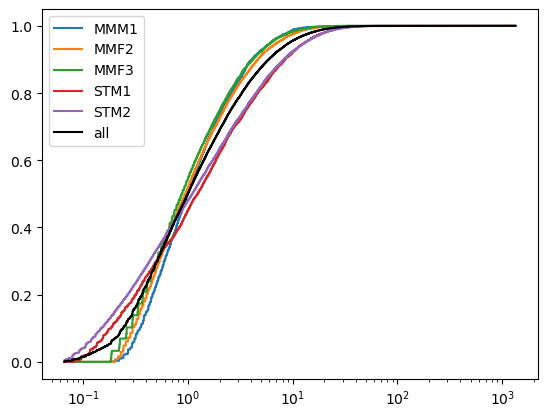

In [61]:
# plot = pd.DataFrame(columns=["BC_neuron", "Mice", "Species", "Dataset"])
area = "OMCc"
all_bc = []
all_x = []
all_cdfs = []
for i in range(num_samples):
    if species[i] == "MMus":
        df = omc_processed[i]
        col = df[area]
        col = col[col >0] # only keep nonzeros
        all_bc.append(col)

all_min = np.concatenate(all_bc).min()
all_max = np.concatenate(all_bc).max()

for i in range(len(all_bc)):
    col = all_bc[i]
    ecdf = ECDF(col)
    x = np.logspace(np.log10(all_min), np.log10(all_max), num=1000)
    all_x.append(x)
    y = ecdf(x)
    all_cdfs.append(y)

    plt.step(x,y, label=mice[i])
plt.xscale("log")

plot = pd.concat(all_bc)
ecdf = ECDF(plot)
x = np.logspace(np.log10(all_min), np.log10(all_max), num=1000)
y = ecdf(x)
plt.step(x,y, label="all", color="black")

plt.legend()

plt.show()



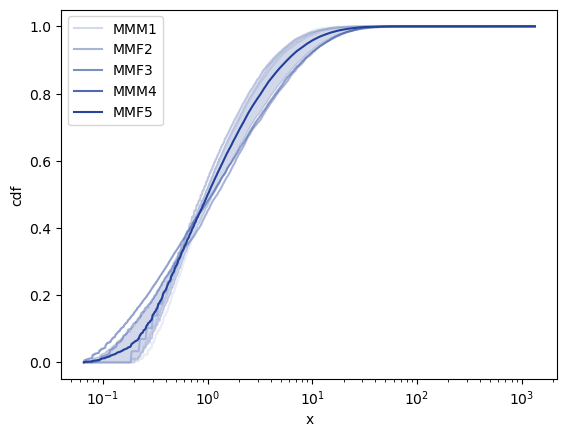

In [83]:
plot_mm = pd.DataFrame(columns=["x", "cdf", "mice", "species", "dataset"])
for i in range(len(mice_mm)):
    int = pd.DataFrame({"x":all_x[i], "cdf":all_cdfs[i], "mice":mice_mm[i], "species":"MMus", "dataset":dataset_mm[i]})
    plot_mm = pd.concat([plot_mm, int])

blue_qual = [blue_cmp.colors[50], blue_cmp.colors[100], blue_cmp.colors[150], blue_cmp.colors[200], blue_cmp.colors[250]]

sns.lineplot(plot_mm, x="x", y="cdf", hue="mice", palette=blue_qual, alpha=0.5)
sns.lineplot(plot_mm, x="x", y="cdf", color=blue_cmp.colors[255])
plt.xscale("log")

In [85]:
# plot = pd.DataFrame(columns=["BC_neuron", "Mice", "Species", "Dataset"])
area = "OMCc"
all_bc = []
all_x = []
all_cdfs = []
for i in range(num_samples):
    df = omc_processed[i]
    col = df[area]
    col = col[col >0] # only keep nonzeros
    all_bc.append(col)

all_min = np.concatenate(all_bc).min()
all_max = np.concatenate(all_bc).max()

plot = pd.DataFrame(columns=["x", "cdf", "mice", "species", "dataset"])

for i in range(num_samples):
    col = all_bc[i]
    ecdf = ECDF(col)
    x = np.logspace(np.log10(all_min), np.log10(all_max), num=1000)
    all_x.append(x)
    y = ecdf(x)
    all_cdfs.append(y)
    int = pd.DataFrame({"x":all_x[i], "cdf":all_cdfs[i], "mice":mice[i], "species":species[i], "dataset":dataset[i]})
    plot = pd.concat([plot, int])

plot

,x,cdf,mice,species,dataset
0,0.036034,0.0,MMM1,MMus,M194
1,0.036416,0.0,MMM1,MMus,M194
2,0.036801,0.0,MMM1,MMus,M194
3,0.037191,0.0,MMM1,MMus,M194
4,0.037585,0.0,MMM1,MMus,M194
...,...,...,...,...,...
995,1281.022203,1.0,STM7,STeg,M220
996,1294.584386,1.0,STM7,STeg,M220
997,1308.290152,1.0,STM7,STeg,M220
998,1322.141021,1.0,STM7,STeg,M220


Text(0.5, 0.98, 'OMCc')

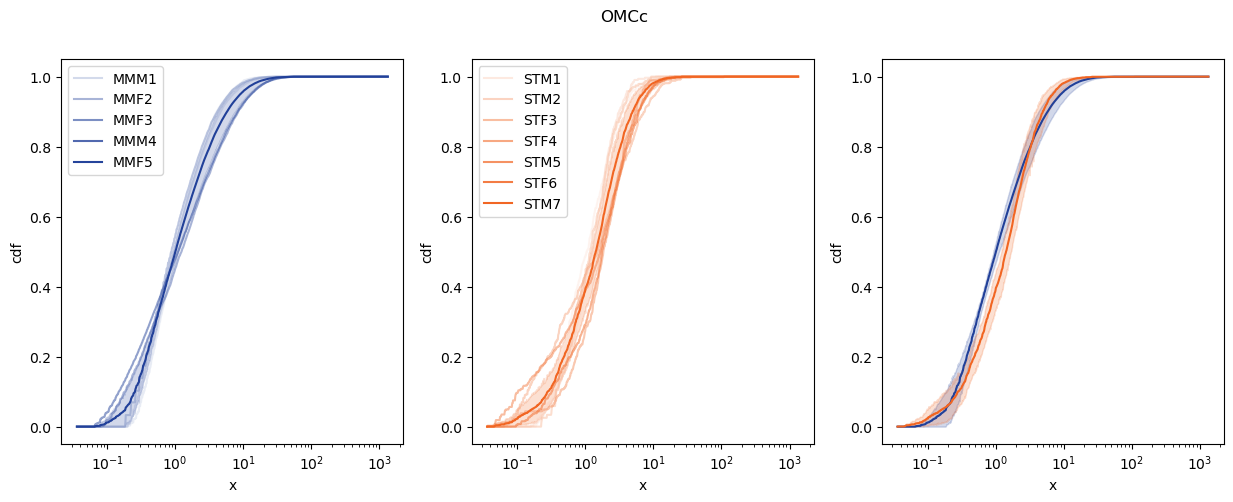

In [88]:
blue_qual = [blue_cmp.colors[50], blue_cmp.colors[100], blue_cmp.colors[150], blue_cmp.colors[200], blue_cmp.colors[250]]
orange_qual = [orange_cmp.colors[36], orange_cmp.colors[72], orange_cmp.colors[108], orange_cmp.colors[144], orange_cmp.colors[180], orange_cmp.colors[216], orange_cmp.colors[252]]

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_mm = plot[plot["species"] =="MMus"]
plot_st = plot[plot["species"] =="STeg"]


sns.lineplot(plot_mm, x="x", y="cdf", hue="mice", palette=blue_qual, alpha=0.5, ax=axs[0])
sns.lineplot(plot_mm, x="x", y="cdf", color=blue_cmp.colors[255], ax=axs[0])
axs[0].set_xscale("log")

sns.lineplot(plot_st, x="x", y="cdf", hue="mice", palette=orange_qual, alpha=0.5, ax=axs[1])
sns.lineplot(plot_st, x="x", y="cdf", color=orange_cmp.colors[255], ax=axs[1])
axs[1].set_xscale("log")

sns.lineplot(plot_mm, x="x", y="cdf", color=blue_cmp.colors[255], ax=axs[2])
sns.lineplot(plot_st, x="x", y="cdf", color=orange_cmp.colors[255], ax=axs[2])
axs[2].set_xscale("log")

plt.suptitle("OMCc")

In [ ]:
# definition -> create dataframe w/ ecdf for area
# plot only summary lineplots

Text(0.5, 1.0, 'OMCc')

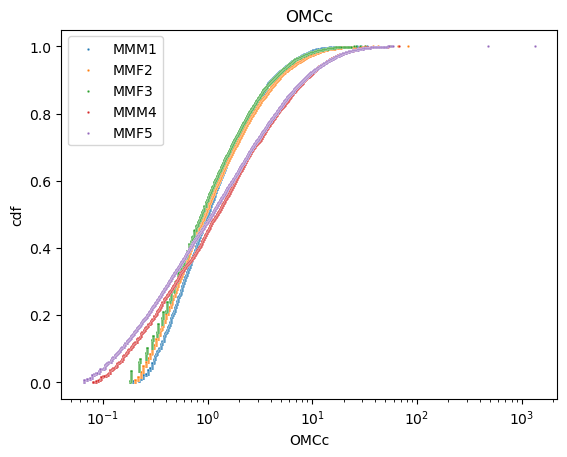

In [10]:
for i in range(num_samples):
    if species[i] == "MMus":
        df = omc_processed[i]
        col = df["OMCc"]
        col = col[col>0]
        plot = col.sort_values().reset_index()
        plot['cdf'] = plot.index.values/plot.shape[0]
        sns.scatterplot(plot, x="OMCc", y="cdf", s=3, label=mice[i])
        plt.xscale("log")

plt.title("OMCc")

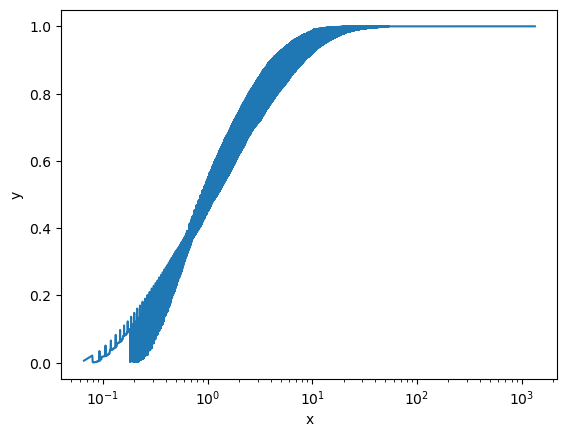

In [11]:
y = np.concatenate(all_cdfs)
x = np.concatenate(all_x)
plot = pd.DataFrame({"x":x, "y":y})
sns.lineplot(plot, x="x", y="y")
plt.xscale("log")


Text(0.5, 1.0, 'STeg')

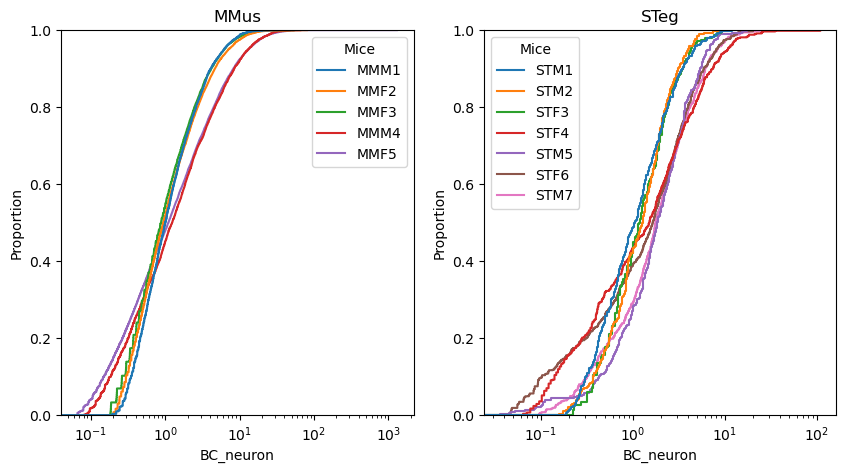

In [12]:
# all cells
plot = pd.DataFrame(columns=["BC_neuron", "Mice", "Species", "Dataset"])
area = "OMCc"
for i in range(num_samples):
    df = omc_processed[i]
    col = df[area]
    col = col[col >0] # only keep nonzeros
    data = pd.DataFrame({"BC_neuron": col, "Mice":mice[i], "Species":species[i], "Dataset":dataset[i]})
    plot = pd.concat([plot, data])


fig, axs = plt.subplots(1, 2, figsize=(10,5))
mm_plot = plot[plot["Species"]=="MMus"]
st_plot = plot[plot["Species"]=="STeg"]

sns.ecdfplot(mm_plot, x="BC_neuron", hue="Mice", log_scale=10, ax=axs[0])
axs[0].set_title("MMus")

sns.ecdfplot(st_plot, x="BC_neuron", hue="Mice", log_scale=10, ax=axs[1])
axs[1].set_title("STeg")




In [20]:
plot

,BC_neuron,Mice,Species,Dataset
0,29.479247,MMM1,MMus,M194
1,26.852660,MMM1,MMus,M194
2,26.606075,MMM1,MMus,M194
3,23.981355,MMM1,MMus,M194
4,22.896693,MMM1,MMus,M194
...,...,...,...,...
872,2.481122,STM7,STeg,M220
873,1.350283,STM7,STeg,M220
874,3.584773,STM7,STeg,M220
875,7.009504,STM7,STeg,M220


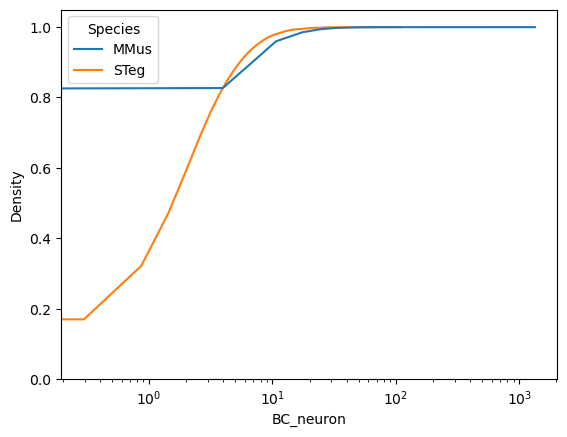

In [21]:
sns.kdeplot(plot, x="BC_neuron", hue="Species", cumulative=True, common_norm=False)
plt.xscale("log")

# heatmaps

Text(0.5, 1.0, 'mmus norm count')

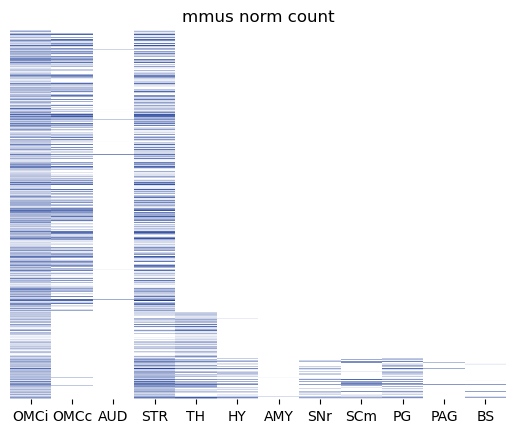

In [7]:
plot = omc_mm_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)


sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.title("mmus norm count")
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)

Text(0.5, 1.0, 'Steg ncounts')

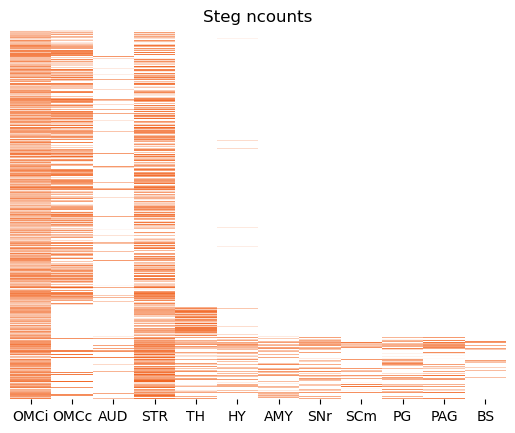

In [8]:
plot = omc_st_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.title("Steg ncounts")
# plt.savefig(out_path+"st_single_heatmap.jpeg", dpi=300)

# heatmaps of an individual animal

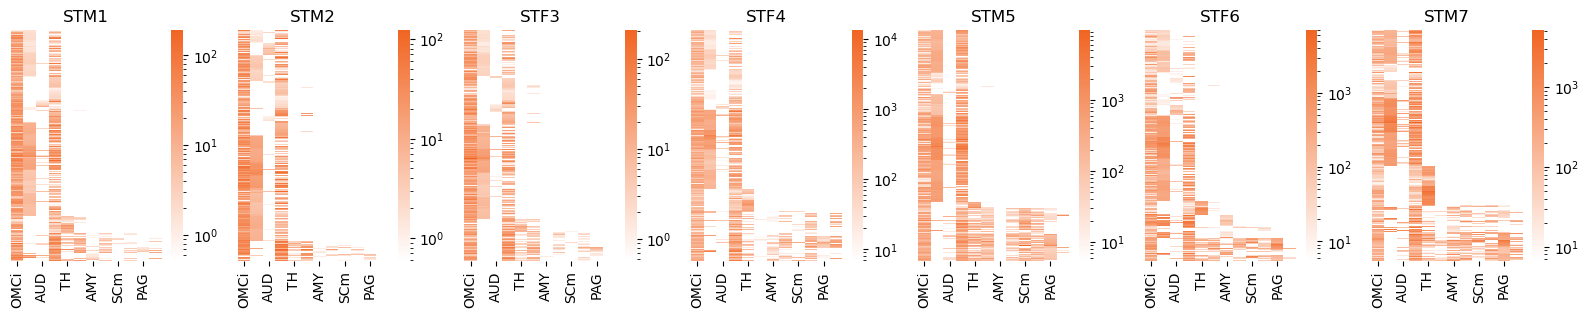

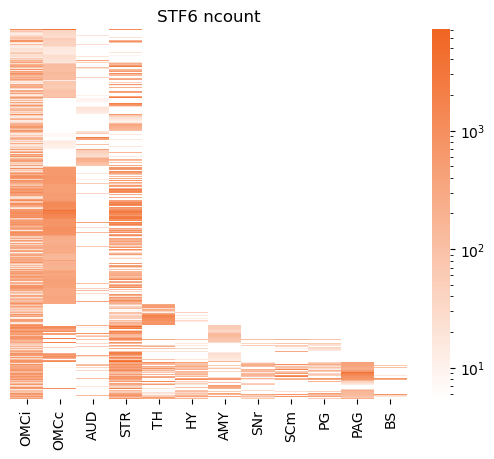

In [9]:
fig, axs = plt.subplots(1, len(omc_st), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_st[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=orange_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])
    i+=1
    
# fig.savefig(out_path+"omc_st_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_st[5]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=orange_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_st[5]+ " ncount")
# plt.savefig(out_path + "st_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

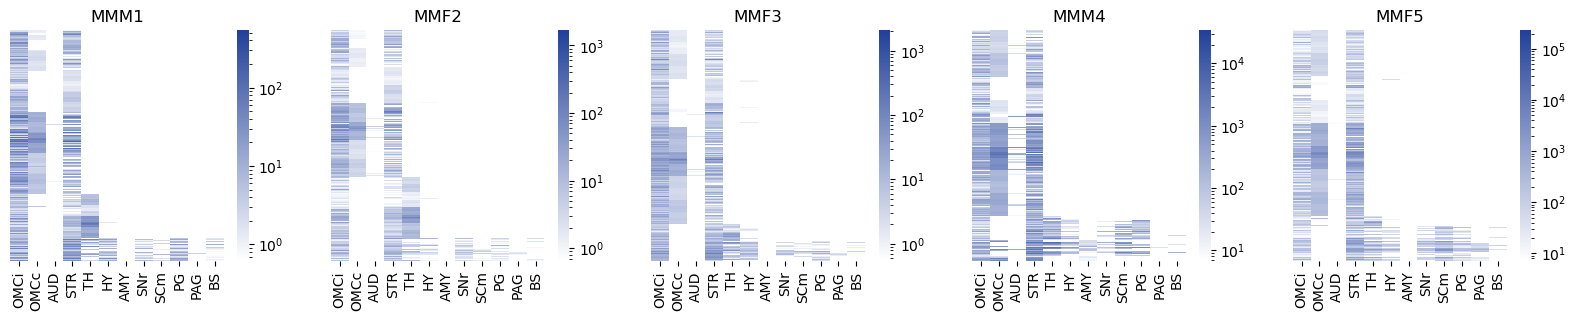

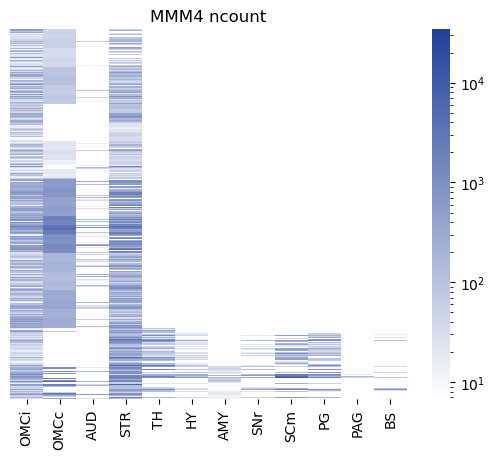

In [10]:
fig, axs = plt.subplots(1, len(omc_mm), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_mm[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=blue_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_mm[i])
    i+=1
    
# fig.savefig(out_path+"omc_mm_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_mm[3]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=blue_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_mm[3]+" ncount")
# plt.savefig(out_path + "MM_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# summary plots

# histograms

In [7]:
def dfs_to_proportions(df_list, drop=["OMCi", "type"], cell_type=None, mi=mice, sp=species, ds=dataset):
    """Output dataframe of proportions in format that can be plotted with seaborn

    Args:
        df_list (list): 
            - List of dataframes of neurons/BC by areas, must be of num_samples size (12)
        drop (list, optional): 
            - Defaults to ["OMCi", "type"]
            - list of areas/columns to drop before calculating proportions
        cell_type (string, optional): 
            - Specify cell types in df, either IT, CT or PT
            - Defaults to None

    Returns:
        plot_df (pandas_dataframe):
            - returns dataframe in format for seaborn plotting
            - columns = areas, and other metadata
    """

    plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species", "dataset"])

    if cell_type == "IT":
        drop = ["OMCi", 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']
    elif cell_type == "PT":
        drop = ["OMCi",'OMCc', 'AUD']

    # mice = []
    # species = []
    # dataset = []

    for i in range(len(df_list)):
        df = df_list[i].drop(drop, axis=1)
        bc_sum = df.sum()
        proportion = bc_sum/df.shape[0]
        df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
        "mice":mi[i], "species":sp[i], "dataset":ds[i]})
        plot_df = pd.concat([plot_df, df_add])
    
    return plot_df

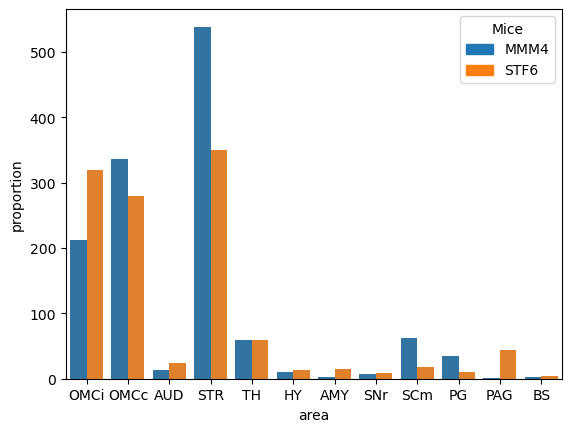

In [8]:
# ncount normalized to median nonzero count then normalized by # of neurons

import matplotlib.patches as mpatches

mm3_processed = dfs_preprocess_counts([omc_mm[3]])

mm3_prop = dfs_to_proportions([omc_mm[3]], drop="type", mi=[mice_mm[3]], sp=["MMus"], ds=[dataset_mm[3]])

st5_processed = dfs_preprocess_counts([omc_st[5]])
st5_prop = dfs_to_proportions([omc_st[5]], drop="type", mi=[mice_st[5]], sp=["STeg"], ds=[dataset_st[5]])


plot_df = pd.concat([mm3_prop, st5_prop]).reset_index(drop=True)
g = sns.barplot(plot_df,x="area", y="proportion", hue="species")
mm_lab = mpatches.Patch(color=sns.color_palette()[0], label=mice_mm[3])
st_lab = mpatches.Patch(color=sns.color_palette()[1], label=mice_st[5])

g.legend(title="Mice", handles=[mm_lab,st_lab])
plt.show(g)
# st5_prop

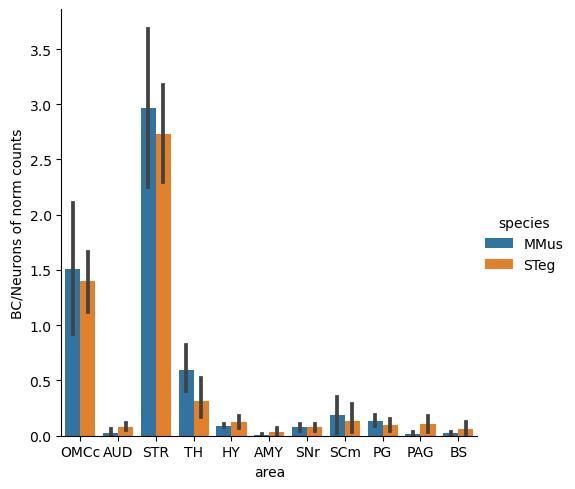

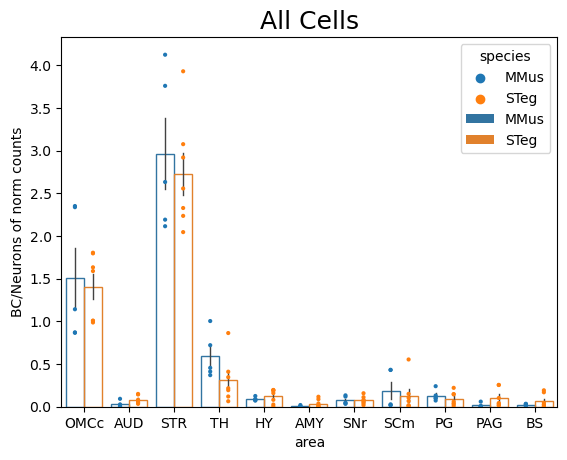

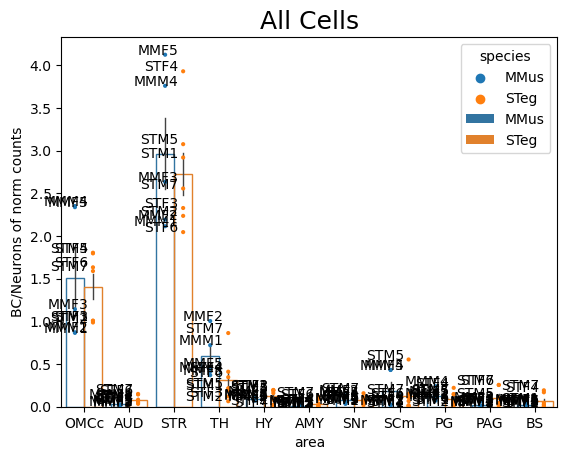

In [9]:
# create dataframe for plotting proportions
plot_processed = dfs_preprocess_counts(omc_clean)
plot_df = dfs_to_proportions(plot_processed).reset_index()

sns.catplot(plot_df, x="area", y="proportion", hue="species", kind="bar")
plt.ylabel("BC/Neurons of norm counts")
# plt.savefig(out_path + "all_hist_bar.jpeg", dpi=300, bbox_inches="tight")
plt.show()

dot_bar_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.ylabel("BC/Neurons of norm counts")
plt.show()


g = dot_bar_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion", hueaxis="species")
for i in range(plot_df.shape[0]):
    g.text(x=plot_df.loc[i,"index"]+0.1, y=plot_df.loc[i,"proportion"]+0.001, s=plot_df.loc[i,"mice"], horizontalalignment='right', size='medium', color='black')
plt.ylabel("BC/Neurons of norm counts")
plt.show(g)

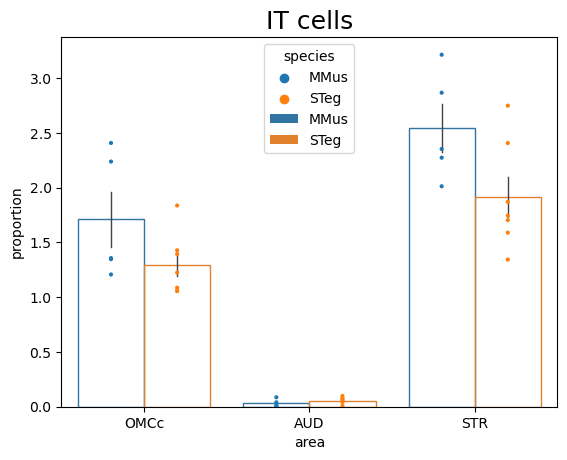

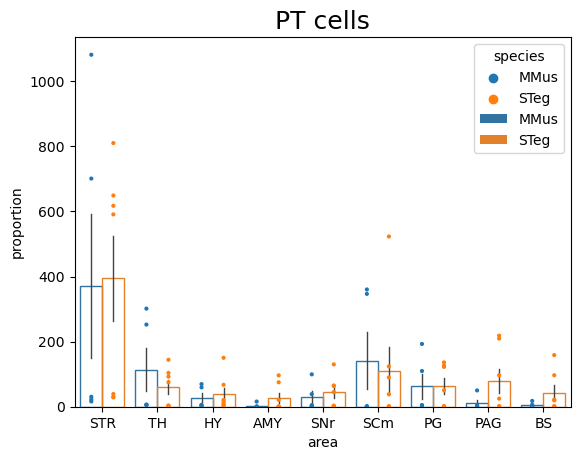

In [12]:
### IT

# create dataframe for plotting proportions
plot_processed = dfs_preprocess_counts(omc_it, drop=["OMCi"])
plot_df = dfs_to_proportions(plot_processed, cell_type="IT")

dot_bar_plot(plot_df, "IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

### PT
# create dataframe for plotting proportions
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")

dot_bar_plot(plot_df, "PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

# individual plots

In [27]:
def individ_node_plot(df, title="", xaxis="Node Degree", yaxis="Normalized Frequency"):
    """Plot connected dots for individual mice colored by species

    Args:
        df (pandas dataframe): - should contain column called "Species" with data labelled
                                as "MMus" or "STeg"
                               - should also contain column called "Dataset w/ data labelled
                                as "M194" or "M220"
                               - should also contain column labelled "mouse" w/ mouse identiy
    """
    fig, ax = plt.subplots()
    sns.scatterplot(df[df['Species']=="MMus"], x=xaxis, y=yaxis, style="Dataset", ax=ax)
    sns.lineplot(df[df['Species']=="MMus"], x=xaxis, y=yaxis, style="mouse", alpha=0.5, ax=ax)
    sns.scatterplot(df[df['Species']=="STeg"], x=xaxis, y=yaxis, style="Dataset", color="orange", legend=False, ax=ax)
    sns.lineplot(df[df['Species']=="STeg"], x=xaxis, y=yaxis, style="mouse", alpha=0.5, ax=ax)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.text(1.1, 0.15, "MMus", color=sns.color_palette("tab10")[0], ha='center', va='center', transform=ax.transAxes) # match blue to seaborn
    plt.text(1.1, 0.1, "STeg", color=sns.color_palette("tab10")[1], ha='center', va='center', transform=ax.transAxes) # match orange to default seaborn colors
    plt.title(title)

    return(fig)

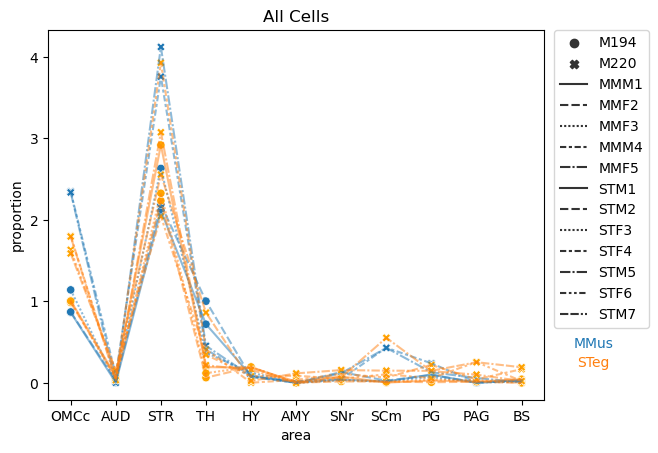

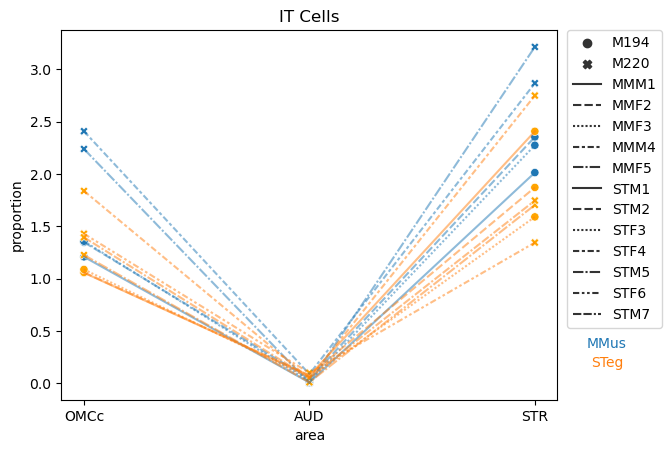

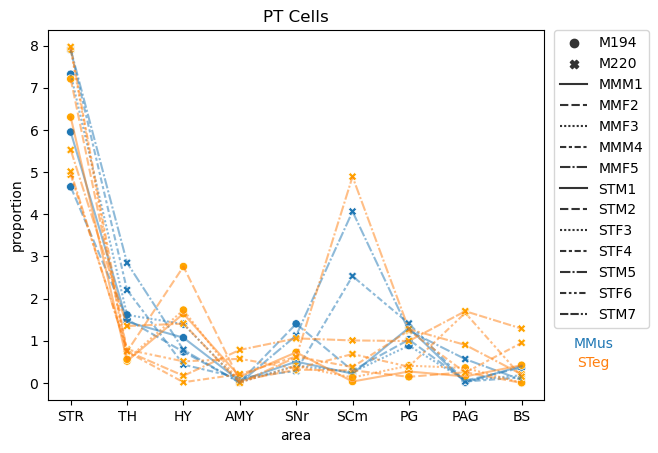

In [28]:
# all cells
plot_df = dfs_to_proportions(dfs_preprocess_counts(omc_clean))
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion")
plt.show()

# it cells
plot_df = dfs_to_proportions(dfs_preprocess_counts(omc_it, drop=["OMCi"]), cell_type="IT")
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "IT Cells", xaxis="area", yaxis="proportion")
plt.show()

# pt cells
plot_df = dfs_to_proportions(dfs_preprocess_counts(omc_pt, drop=["OMCi"]), cell_type="PT")
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "PT Cells", xaxis="area", yaxis="proportion")
plt.show()

# Dot Plots

In [33]:
it_processed = dfs_preprocess_counts(omc_it, drop=["OMCi"])
it_OMC_proportions = dfs_to_proportions(plot_processed, cell_type="IT")

# # OMC proportions
# for i in range(num_samples):
#     total = omc_it[i].shape[0]
#     prop = omc_it[i].sum()/total
#     it_OMC_proportions.append(prop)
it_OMC_proportions

,area,proportion,mice,species,dataset
0,OMCc,1.207430,MMM1,MMus,M194
1,AUD,0.005642,MMM1,MMus,M194
2,STR,2.012601,MMM1,MMus,M194
0,OMCc,1.347034,MMF2,MMus,M194
1,AUD,0.040316,MMF2,MMus,M194
2,STR,2.352966,MMF2,MMus,M194
0,OMCc,1.356877,MMF3,MMus,M194
1,AUD,0.016000,MMF3,MMus,M194
2,STR,2.273774,MMF3,MMus,M194
0,OMCc,1.055479,STM1,STeg,M194


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


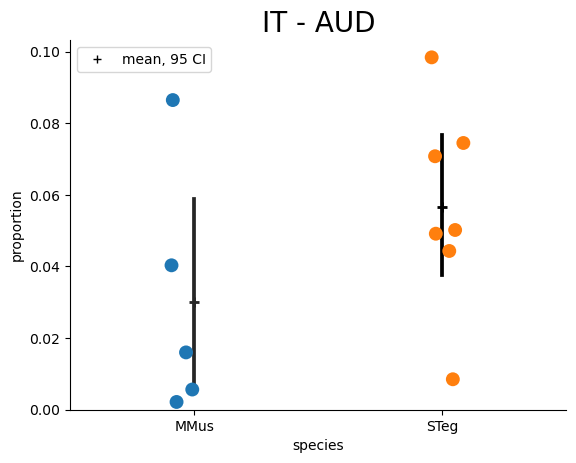

In [41]:
# AUD
area = "AUD"
fig, ax = plt.subplots()
idx = it_OMC_proportions["area"] == area
df = it_OMC_proportions[idx]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + area, size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


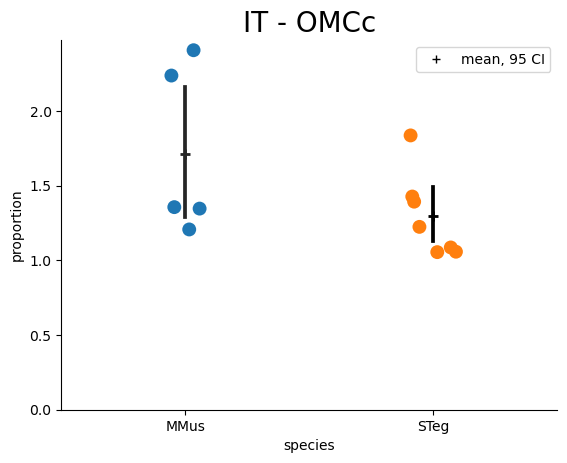

In [42]:
# OMCc
area = "OMCc"
fig, ax = plt.subplots()
idx = it_OMC_proportions["area"] == area
df = it_OMC_proportions[idx]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + area, size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


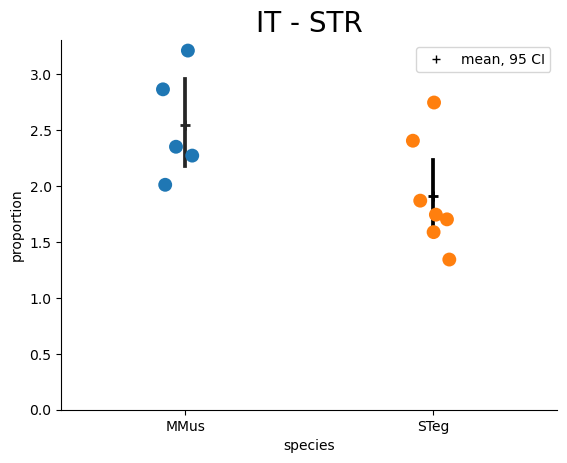

In [43]:
# STR
area = "STR"
fig, ax = plt.subplots()
idx = it_OMC_proportions["area"] == area
df = it_OMC_proportions[idx]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + area, size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


In [47]:
pt_processed = dfs_preprocess_counts(omc_pt, drop=["OMCi"])
pt_OMC_proportions = dfs_to_proportions(pt_processed, cell_type="PT")

pt_OMC_proportions

,area,proportion,mice,species,dataset
0,STR,5.950359,MMM1,MMus,M194
1,TH,1.450951,MMM1,MMus,M194
2,HY,1.072364,MMM1,MMus,M194
3,AMY,0.047786,MMM1,MMus,M194
4,SNr,0.505130,MMM1,MMus,M194
...,...,...,...,...,...
4,SNr,1.056588,STM7,STeg,M220
5,SCm,1.007631,STM7,STeg,M220
6,PG,0.994062,STM7,STeg,M220
7,PAG,1.701414,STM7,STeg,M220


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


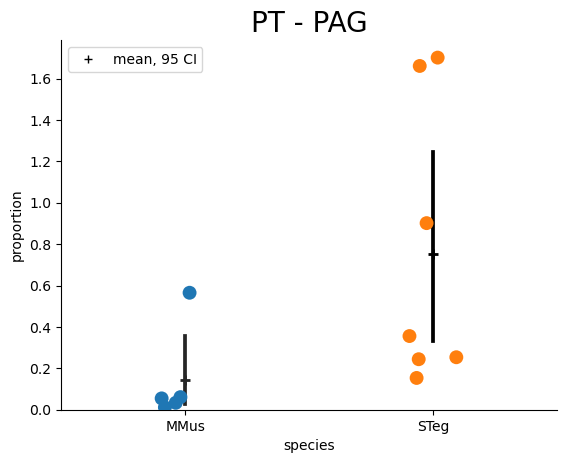

In [49]:
# PAG
area = "PAG"
fig, ax = plt.subplots()
idx = pt_OMC_proportions["area"] == area
df = pt_OMC_proportions[idx]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("PT - " + area, size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


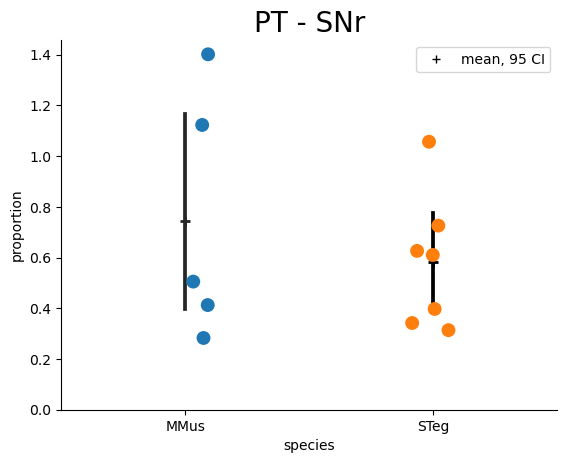

In [50]:
# SNr
area = "SNr"
fig, ax = plt.subplots()
idx = pt_OMC_proportions["area"] == area
df = pt_OMC_proportions[idx]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("PT - " + area, size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


# Calculate probs?

In [27]:
# combine it/pt into one df
omc_mm_it_all = pd.concat(omc_it_mm)
omc_mm_pt_all = pd.concat(omc_pt_mm)
omc_st_it_all = pd.concat(omc_it_st)
omc_st_pt_all = pd.concat(omc_pt_st)


In [28]:
sim_reps = 1000
sim_sample_size=300

In [29]:
# create distribution by randomly sampling data
mm_it_probs = est_proj_prob(omc_mm_it_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_it_probs = est_proj_prob(omc_st_it_all, reps=sim_reps, sample_size=sim_sample_size)

mm_it_probs = pd.DataFrame(mm_it_probs, columns=omc_mm_it_all.columns)
st_it_probs = pd.DataFrame(st_it_probs, columns=omc_st_it_all.columns)


In [30]:
# create distribution by randomly sampling data
mm_pt_probs = est_proj_prob(omc_mm_pt_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_pt_probs = est_proj_prob(omc_st_pt_all, reps=sim_reps, sample_size=sim_sample_size)

mm_pt_probs = pd.DataFrame(mm_pt_probs, columns=omc_mm_pt_all.columns)
st_pt_probs = pd.DataFrame(st_pt_probs, columns=omc_st_pt_all.columns)


# try with t test
- parametric test between samples to calc pvalues

In [57]:
it_areas = it_OMC_proportions.area.unique()
it_areas
len(it_areas)

3

In [60]:
mmus_it_prop = []
steg_it_prop = []
areas = it_OMC_proportions.area.unique()
all = it_OMC_proportions

for i in range(len(areas)):
    df = all[all["area"] == areas[i]]
    mm = df[df["species"]=="MMus"]
    mmus_it_prop.append(mm["proportion"])
    st = df[df["species"]=="STeg"]
    steg_it_prop.append(st["proportion"])
mmus_it_array = np.array(mmus_it_prop)
steg_it_array = np.array(steg_it_prop)
mmus_it_array

array([[1.20742964e+00, 1.34703352e+00, 1.35687690e+00, 2.40785756e+00,
        2.23819460e+00],
       [5.64162922e-03, 4.03160607e-02, 1.60002654e-02, 8.64453669e-02,
        2.16597244e-03],
       [2.01260140e+00, 2.35296632e+00, 2.27377389e+00, 2.86677068e+00,
        3.21359611e+00]])

In [61]:

# pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_it_array, steg_it_array, axis=1) # parametric
# results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_it_array.mean(axis=1)
plot["st_mean"] = steg_it_array.mean(axis=1)
# plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"]) # modulation index
plot["fold_change"] = plot["st_mean"]/(plot["mm_mean"])
plot["log2_fc"] = np.log2(plot["fold_change"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_it = ["OB", "OMCi", "ACAi", "ACAc", "TH", "HY", "AMY", "HIP", "SNr", "SCm", "PG", "PAG", "BS"]
idx = plot["area"].isin(non_it)
plot = plot[~idx].reset_index(drop=True)


plot



,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p
0,OMCc,0.122806,1.711478,1.297691,0.758228,-0.399296,0.910782
1,AUD,0.177698,0.030114,0.056531,1.877256,0.908625,0.750318
2,STR,0.052810,2.543942,1.915439,0.752941,-0.409391,1.277284


Text(0, 0.5, '-log10(p-value)')

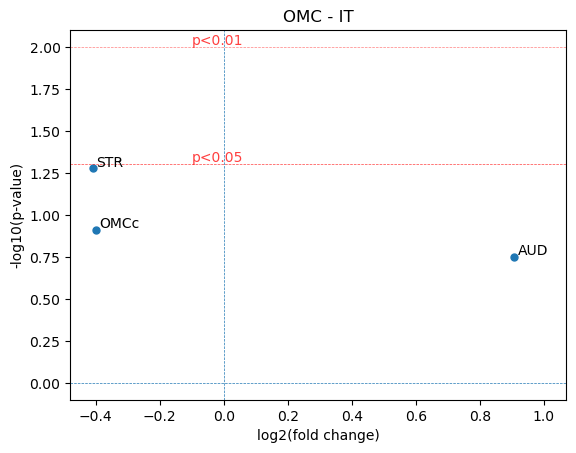

In [62]:

df = plot

x=df.log2_fc
y=df.nlog10_p

plt.scatter(x,y, s=25)
# plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.1, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.1, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.log2_fc[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - IT")
plt.xlabel('log2(fold change)')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_it_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_it_volcano.svg',dpi=300, bbox_inches='tight')

In [63]:
mmus_pt_prop = []
steg_pt_prop = []
areas = pt_OMC_proportions.area.unique()
all = pt_OMC_proportions

for i in range(len(areas)):
    df = all[all["area"] == areas[i]]
    mm = df[df["species"]=="MMus"]
    mmus_pt_prop.append(mm["proportion"])
    st = df[df["species"]=="STeg"]
    steg_pt_prop.append(st["proportion"])
mmus_pt_array = np.array(mmus_pt_prop)
steg_pt_array = np.array(steg_pt_prop)
mmus_pt_array

array([[5.95035878e+00, 4.65070822e+00, 7.32179010e+00, 7.90309387e+00,
        7.91115926e+00],
       [1.45095054e+00, 1.50694603e+00, 1.61319425e+00, 2.20262284e+00,
        2.84801723e+00],
       [1.07236432e+00, 7.36443686e-01, 1.39526673e+00, 4.34185544e-01,
        7.84633731e-01],
       [4.77862247e-02, 1.84157201e-02, 1.61699053e-02, 1.16277712e-01,
        5.77615907e-04],
       [5.05129964e-01, 1.40125481e+00, 4.12644011e-01, 2.82852234e-01,
        1.12276739e+00],
       [2.19839424e-01, 2.93055030e-01, 2.53560230e-01, 2.53358477e+00,
        4.06600296e+00],
       [1.30577131e+00, 1.02616980e+00, 8.84598718e-01, 1.40954532e+00,
        1.23802821e+00],
       [1.13456509e-02, 5.47629505e-02, 6.08674797e-02, 3.34253545e-02,
        5.65199887e-01],
       [4.02737744e-01, 3.60622007e-01, 1.82223886e-01, 1.30112698e-01,
        7.07162432e-02]])

In [64]:

# pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_pt_array, steg_pt_array, axis=1)
# results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_pt_array.mean(axis=1)
plot["st_mean"] = steg_pt_array.mean(axis=1)
# plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"])
plot["fold_change"] = plot["st_mean"]/(plot["mm_mean"])
plot["log2_fc"] = np.log2(plot["fold_change"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_pt = ["OB", "OMCi", "ACAi", "ACAc", "HIP"]
idx = plot["area"].isin(non_pt)
plot = plot[~idx].reset_index(drop=True)

plot

,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p
0,STR,0.679257,6.747422,6.410212,0.950024,-0.073964,0.167966
1,TH,0.001105,1.924346,0.779245,0.404940,-1.304220,2.956446
2,HY,0.548164,0.884579,1.176029,1.329479,0.410861,0.261089
3,AMY,0.153443,0.039845,0.254542,6.388225,2.675415,0.814053
4,SNr,0.468272,0.744930,0.581687,0.780862,-0.356861,0.329502
5,SCm,0.692792,1.473208,1.060050,0.719552,-0.474829,0.159397
6,PG,0.057054,1.172823,0.674614,0.575205,-0.797852,1.243715
7,PAG,0.086980,0.145120,0.753031,5.189010,2.375459,1.060579
8,BS,0.408460,0.229283,0.430643,1.878220,0.909366,0.388850


Text(0, 0.5, '-log10(p-value)')

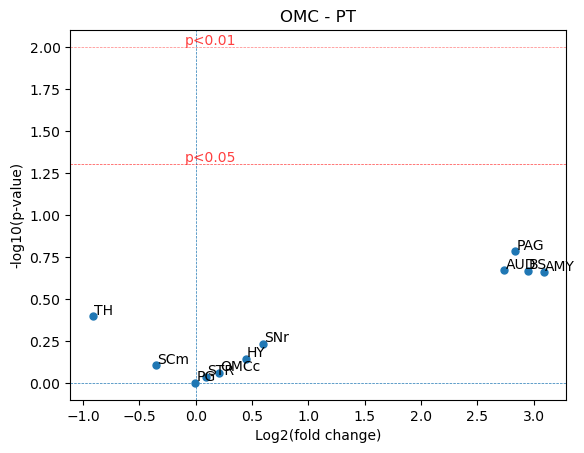

In [36]:





df = plot

x=df.log2_fc
y=df.nlog10_p

plt.scatter(x,y, s=25)
# plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.1, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.1, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.log2_fc[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - PT")
plt.xlabel('Log2(fold change)')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_pt_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_pt_volcano.svg',dpi=300, bbox_inches='tight')
